## Installing Pycaret

Let's install the pycaret full version according to the instructions on the [installation page](https://pycaret.readthedocs.io/en/latest/installation.html)

In [1]:
!pip install "pycaret[full]==2.3.1"

  Using cached pycaret-2.3.1-py3-none-any.whl.metadata (8.9 kB)
  Using cached scipy-1.5.4-cp39-cp39-macosx_10_9_x86_64.whl.metadata (2.0 kB)
  Using cached numpy-1.19.5-cp39-cp39-macosx_10_9_x86_64.whl.metadata (2.0 kB)
  Using cached scikit-learn-0.23.2.tar.gz (7.2 MB)
  Installing build dependencies ... error
  error: subprocess-exited-with-error
  
  × pip subprocess to install build dependencies did not run successfully.
  │ exit code: 1
  ╰─> [2365 lines of output]
      Ignoring numpy: markers 'python_version == "3.6" and platform_system != "AIX" and platform_python_implementation == "CPython"' don't match your environment
      Ignoring numpy: markers 'python_version == "3.6" and platform_system != "AIX" and platform_python_implementation != "CPython"' don't match your environment
      Ignoring numpy: markers 'python_version == "3.7" and platform_system != "AIX"' don't match your environment
      Ignoring numpy: markers 'python_version == "3.6" and platform_system == "AIX"' d

In [2]:
#!pip install --upgrade pycaret

## Importing Libs

In [3]:
# Standard libs
import numpy as np
import pandas as pd

# Automl libs
from pycaret.classification import *

# Dataviz libs
import shap
import matplotlib.pyplot as plt

# Machine Learning Metrics libs
from sklearn.metrics import roc_curve, roc_auc_score

## Loading Data

In [4]:
# Load data

root_folder = '/Users/dellacorte/py-projects/data-science/automated-machine-learning-reference/databases/'

df_abt = pd.read_csv(f'{root_folder}/propensao_revenda_abt.csv')

# Get the training base
df_train = df_abt.query('data_ref_safra < "2018-03-01"')

# Get the evaluation base (out of time)
df_oot = df_abt.query('data_ref_safra == "2018-03-01"')

## Identifying Modeling Variables

In [5]:
key_vars = ['data_ref_safra', 'seller_id']
num_vars = ['tot_orders_12m', 'tot_items_12m', 'tot_items_dist_12m', 'receita_12m', 'recencia']
cat_vars = ['uf']
target = 'nao_revendeu_next_6m'

features = cat_vars + num_vars

In [6]:
import pycaret
print(pycaret.__version__)

3.3.2


# Using PyCaret

**PyCaret** has the `setup` function, which is used to define variable types, pre-process variables and much more!

Initial pre-processing for setup!

At no time was the type of variables informed. This setup function is used to define the types of variables, pre-processing and other issues.

Other examples of the setup would be informing the amount of pca, the method we could use, missing values ​​and how to treat them, train-test-split, one-hot-encoding...

The library makes the inferences that we would need to make, as well as the transformations that it deems necessary.

In [7]:
pip show pycaret

Name: pycaret
Version: 3.3.2
Summary: PyCaret - An open source, low-code machine learning library in Python.
Home-page: https://github.com/pycaret/pycaret
Author: Moez Ali
Author-email: moez.ali@queensu.ca
License: MIT
Location: /Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages
Requires: category-encoders, cloudpickle, deprecation, imbalanced-learn, importlib-metadata, ipython, ipywidgets, jinja2, joblib, kaleido, lightgbm, markupsafe, matplotlib, nbformat, numba, numpy, pandas, plotly, plotly-resampler, pmdarima, psutil, pyod, requests, schemdraw, scikit-learn, scikit-plot, scipy, sktime, statsmodels, tbats, tqdm, wurlitzer, xxhash, yellowbrick
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [8]:
# Check for Duplicate Indices
print("Duplicate indices in df_abt:", df_abt.index.duplicated().any())
print("Duplicate indices in df_oot:", df_oot.index.duplicated().any())

Duplicate indices in df_abt: False
Duplicate indices in df_oot: False


In [9]:
# Reset the Index
df_abt = df_abt.reset_index(drop=True)
df_oot = df_oot.reset_index(drop=True)

In [10]:
# Setup Function
exp_setup = setup(
    data=df_abt,
    test_data=df_oot,
    target=target,
    ignore_features=key_vars,
    categorical_features=cat_vars,
    numeric_features=num_vars,
    session_id=42,
    index=False  # Reset the index during setup
)

,Description,Value
0,Session id,42
1,Target,nao_revendeu_next_6m
2,Target type,Binary
3,Original data shape,"(7243, 9)"
4,Transformed data shape,"(7243, 28)"
5,Transformed train set shape,"(5369, 28)"
6,Transformed test set shape,"(1874, 28)"
7,Ignore features,2
8,Numeric features,5
9,Categorical features,1


In [11]:
type(exp_setup)

pycaret.classification.oop.ClassificationExperiment

In [12]:
X_train = df_train
X_test  = df_oot

In [13]:
# Check number of rows in training and test datasets
print("Number of rows in training data:", df_train.shape[0])
print("Number of rows in testing data:", df_oot.shape[0])

# Check total number of rows
total_rows = df_train.shape[0] + df_oot.shape[0]
print("Total rows in combined data:", total_rows)

# Check number of features
print("Number of features:", df_train.shape[1])

Number of rows in training data: 3495
Number of rows in testing data: 1874
Total rows in combined data: 5369
Number of features: 9


We can always review the configuration of the experiment we are carrying out with the command `help(get_config)`

In [14]:
help(get_config)

Help on function get_config in module pycaret.classification.functional:

get_config(variable: Optional[str] = None)
    This function is used to access global environment variables.
    
    Example
    -------
    >>> X_train = get_config('X_train')
    
    This will return training features.
    
    
    variable : str, default = None
        Name of the variable to return the value of. If None,
        will return a list of possible names.
    
    
    Returns
    -------
    variable



With the `get_config` function, we can fetch any of the configuration objects. We can fetch the transformed data:

In [15]:
get_config('X')

,uf,tot_orders_12m,tot_items_12m,tot_items_dist_12m,receita_12m,recencia
0,SP,3,3,1,2685.000000,74
1,ES,171,207,9,21275.230469,2
2,SP,38,42,15,781.799988,2
3,GO,1,1,1,120.000000,16
4,SP,130,141,75,16228.879883,8
...,...,...,...,...,...,...
7238,MG,4,4,3,124.599998,12
7239,SP,5,5,5,385.589996,0
7240,PR,11,12,8,1450.199951,7
7241,SP,13,13,3,1709.869995,0


Also the data preparation pipeline:

In [16]:
prep_pipe = exp_setup.get_config('pipeline')
print(prep_pipe)

Pipeline(memory=FastMemory(location=/var/folders/vb/yxjjx1m94n93ty4t50m8f2b40000gn/T/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['tot_orders_12m', 'tot_items_12m',
                                             'tot_items_dist_12m',
                                             'receita_12m', 'recencia'],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              keep_empty_features=False,
                                                              missing_va...
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                          

## Training Multiple Models

The `compare_models()` function will train multiple models, evaluate them using cross-validation and return the best model. Models are trained using training data only. 
This function prints a table with the results of all models and returns the best model according to the metric passed in the `sort` parameter. By default, it chooses the best model using `accuracy`, but we will ask it to return the model with the best `auc`.

In [17]:
compare_models(fold=5, sort='auc')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.8655,0.9332,0.7954,0.8440,0.8187,0.7120,0.7131,0.1100
xgboost,Extreme Gradient Boosting,0.8665,0.9311,0.8125,0.8346,0.8230,0.7159,0.7164,0.2100
et,Extra Trees Classifier,0.8631,0.9280,0.7949,0.8386,0.8160,0.7072,0.7080,0.0940
catboost,CatBoost Classifier,0.8560,0.9247,0.7974,0.8215,0.8089,0.6935,0.6941,0.7240
lightgbm,Light Gradient Boosting Machine,0.8508,0.9209,0.7901,0.8143,0.8018,0.6822,0.6827,0.4900
gbc,Gradient Boosting Classifier,0.8419,0.9122,0.7818,0.8007,0.7908,0.6638,0.6643,0.1260
ada,Ada Boost Classifier,0.8240,0.8991,0.7389,0.7880,0.7622,0.6228,0.6241,0.0640
ridge,Ridge Classifier,0.8106,0.8990,0.5791,0.8861,0.7004,0.5706,0.5983,0.0180
lda,Linear Discriminant Analysis,0.8100,0.8988,0.5806,0.8824,0.7003,0.5697,0.5965,0.0240
lr,Logistic Regression,0.8247,0.8979,0.6678,0.8413,0.7444,0.6138,0.6234,0.9400


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, n_estimators=100, n_jobs=-1,
                       oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

If we want the results printed in the table in a dataframe, we just need to execute the `pull` function after any printed result.

We can save this table/DataFrame in a .csv file with the `pull` function

In [18]:
compare_models_results = pull()
compare_models_results

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.8655,0.9332,0.7954,0.8440,0.8187,0.7120,0.7131,0.110
xgboost,Extreme Gradient Boosting,0.8665,0.9311,0.8125,0.8346,0.8230,0.7159,0.7164,0.210
et,Extra Trees Classifier,0.8631,0.9280,0.7949,0.8386,0.8160,0.7072,0.7080,0.094
catboost,CatBoost Classifier,0.8560,0.9247,0.7974,0.8215,0.8089,0.6935,0.6941,0.724
lightgbm,Light Gradient Boosting Machine,0.8508,0.9209,0.7901,0.8143,0.8018,0.6822,0.6827,0.490
gbc,Gradient Boosting Classifier,0.8419,0.9122,0.7818,0.8007,0.7908,0.6638,0.6643,0.126
ada,Ada Boost Classifier,0.8240,0.8991,0.7389,0.7880,0.7622,0.6228,0.6241,0.064
ridge,Ridge Classifier,0.8106,0.8990,0.5791,0.8861,0.7004,0.5706,0.5983,0.018
lda,Linear Discriminant Analysis,0.8100,0.8988,0.5806,0.8824,0.7003,0.5697,0.5965,0.024
lr,Logistic Regression,0.8247,0.8979,0.6678,0.8413,0.7444,0.6138,0.6234,0.940


We can then save for future use:

In [19]:
models_folder = '/Users/dellacorte/py-projects/data-science/automated-machine-learning-reference/models/'
compare_models_results.to_csv(f'{models_folder}/compare_models_results.csv', index=False)

The best model found was a `Random Forest`.

To find the models and their respective names, we can search the library documentation.

In [20]:
rf = create_model('rf', fold=5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8399,0.9254,0.7518,0.8153,0.7823,0.6560,0.6573
1,0.8594,0.9296,0.7591,0.8571,0.8052,0.6958,0.6990
2,0.8911,0.9550,0.8370,0.8731,0.8547,0.7676,0.7680
3,0.8724,0.9325,0.8098,0.8491,0.8290,0.7273,0.7279
4,0.8649,0.9235,0.8195,0.8256,0.8225,0.7134,0.7134
Mean,0.8655,0.9332,0.7954,0.8440,0.8187,0.7120,0.7131
Std,0.0167,0.0113,0.0339,0.0210,0.0242,0.0367,0.0362


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [21]:
rf

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, n_estimators=100, n_jobs=-1,
                       oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [22]:
rf.feature_importances_

array([1.03666194e-02, 1.34737533e-03, 2.57799370e-03, 7.57759539e-03,
       7.01904231e-03, 3.52840766e-04, 6.80751768e-03, 6.04318524e-03,
       4.86163613e-03, 6.80883542e-04, 2.69402915e-03, 8.93422590e-04,
       2.97022355e-04, 1.65398149e-04, 1.72144118e-04, 2.75472566e-03,
       1.11437964e-03, 1.37642699e-03, 4.24502067e-04, 2.94507773e-04,
       1.99719251e-05, 7.92893454e-05, 9.80626554e-02, 1.02743019e-01,
       7.30880977e-02, 2.01419304e-01, 4.66766415e-01])

In [23]:
rf.n_estimators

100

## Hyperparameter Optimization

The `tune_model` function performs a `RandomSearch` with 10 iterations by default. Increasing the number of iterations generally leads to a greater chance of having more optimized models.

`RandomSearch` is another version of `GridSearch`, which instead of doing a complete search through the grid, will search randomly for the number of times we pass in the `n_iter` parameter. By default, `n_iter = 10`.

`RandomSearch` performs searches within the libraries to find the best hyperparameters and their combinations.

Combination of RandomSearch and GridSearch

In [24]:
tuned_rf = tune_model(rf, fold=5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8305,0.9113,0.7324,0.8070,0.7679,0.6349,0.6368
1,0.8315,0.9034,0.7251,0.8142,0.7671,0.6357,0.6383
2,0.8482,0.9221,0.7883,0.8100,0.7990,0.6771,0.6773
3,0.8371,0.9086,0.7732,0.7945,0.7837,0.6530,0.6532
4,0.8416,0.9086,0.7927,0.7927,0.7927,0.6645,0.6645
Mean,0.8378,0.9108,0.7623,0.8037,0.7821,0.6531,0.6540
Std,0.0066,0.0062,0.0283,0.0086,0.0129,0.0164,0.0155


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


We were unable to improve the original model. Let's try to increase the number of iterations to 30.

In [25]:
tuned_rf = tune_model(rf, fold=5, optimize='AUC', n_iter=30)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8305,0.9113,0.7324,0.8070,0.7679,0.6349,0.6368
1,0.8315,0.9034,0.7251,0.8142,0.7671,0.6357,0.6383
2,0.8482,0.9221,0.7883,0.8100,0.7990,0.6771,0.6773
3,0.8371,0.9086,0.7732,0.7945,0.7837,0.6530,0.6532
4,0.8416,0.9086,0.7927,0.7927,0.7927,0.6645,0.6645
Mean,0.8378,0.9108,0.7623,0.8037,0.7821,0.6531,0.6540
Std,0.0066,0.0062,0.0283,0.0086,0.0129,0.0164,0.0155


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [26]:
tuned_rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

## Analyzing the Model and Metrics

### ROC Curve

Available columns in predictions: Index(['uf', 'tot_orders_12m', 'tot_items_12m', 'tot_items_dist_12m',
       'receita_12m', 'recencia', 'prediction_label', 'prediction_score'],
      dtype='object')


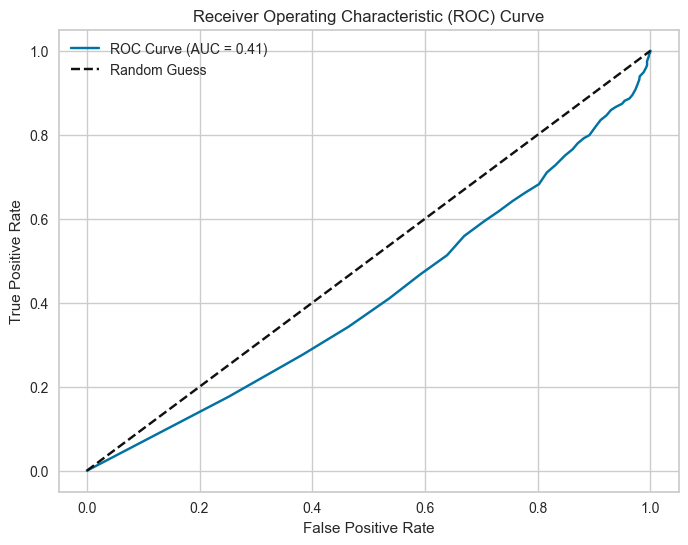

In [27]:
# Remove invalid rows or fill missing values
df_oot = df_oot.dropna(subset=[target])  # Drop rows with missing target
df_oot[target] = pd.to_numeric(df_oot[target], errors='coerce')  # Ensure numeric

# Get predictions and check available columns
predictions = predict_model(rf, data=exp_setup.get_config('X_test'))
print("Available columns in predictions:", predictions.columns)

# Replace 'Score' with the correct column name for probabilities
y_pred_prob = predictions['prediction_score']  # Use the correct column name for the positive class

y_true = df_oot[target]  # Replace `target` with your column name
fpr, tpr, _ = roc_curve(y_true, y_pred_prob)
auc = roc_auc_score(y_true, y_pred_prob)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

### Feature Importance

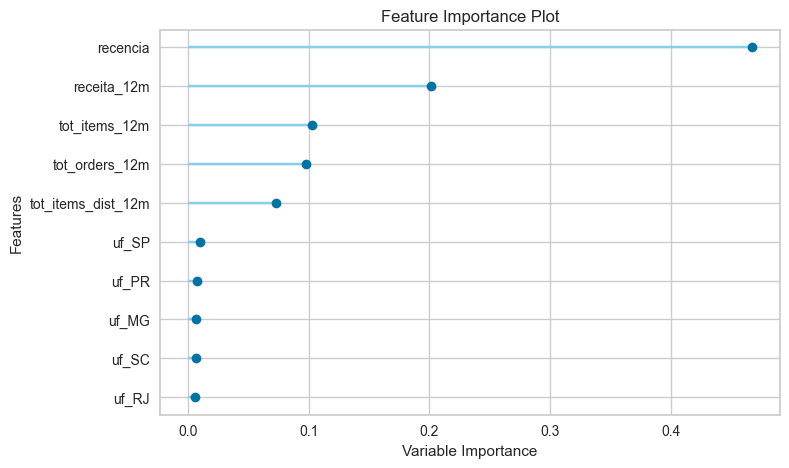

In [28]:
# list of the most important characteristics to the least important ones
plot_model(rf, plot='feature')

### Confusion Matrix

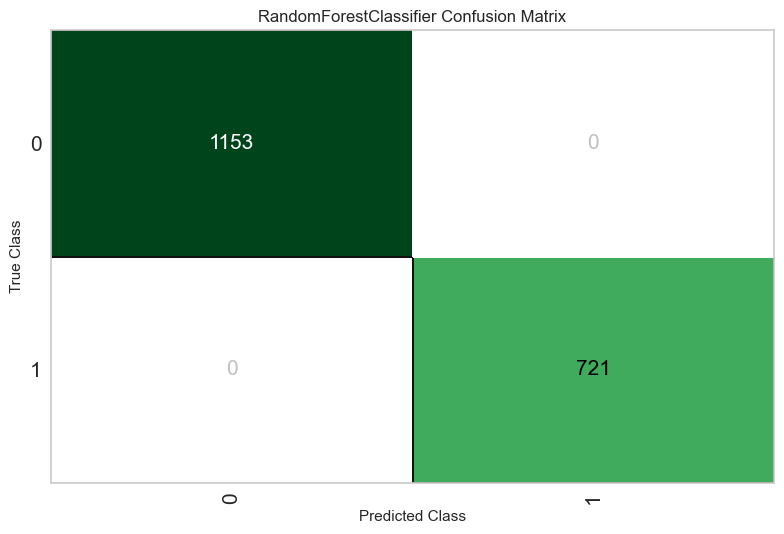

In [29]:
# in training data
plot_model(rf, plot='confusion_matrix')

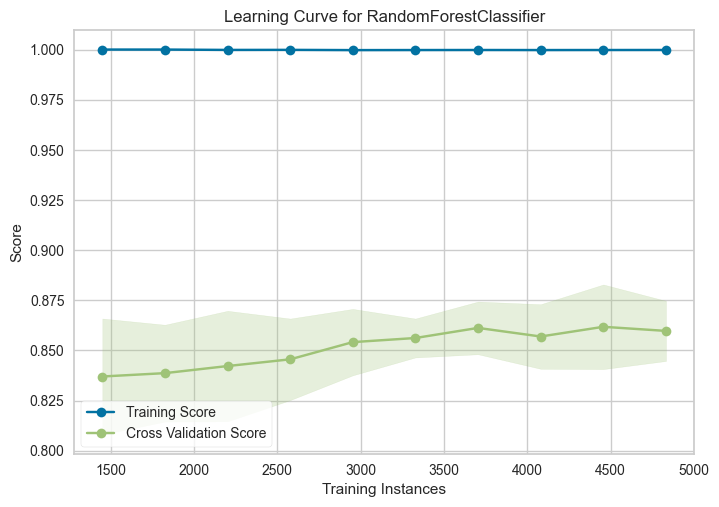

In [30]:
# plotting the learning_curve graph
plot_model(rf, plot='learning')

## Metrics in the Test/Hold-Out Set

In [31]:
predict_model(rf)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


,uf,tot_orders_12m,tot_items_12m,tot_items_dist_12m,receita_12m,recencia,nao_revendeu_next_6m,prediction_label,prediction_score
5369,SP,3,3,1,2685.000000,133,1,1,0.97
5370,ES,178,209,9,21621.130859,8,0,0,0.96
5371,SP,44,48,20,1029.199951,4,0,0,0.96
5372,GO,1,1,1,120.000000,75,1,1,0.94
5373,SP,124,132,72,15104.919922,12,0,0,1.00
...,...,...,...,...,...,...,...,...,...
7238,MG,4,4,3,124.599998,12,1,1,0.67
7239,SP,5,5,5,385.589996,0,0,0,0.97
7240,PR,11,12,8,1450.199951,7,0,0,0.97
7241,SP,13,13,3,1709.869995,0,0,0,0.95


In [32]:
test_result = predict_model(rf, raw_score=True, probability_threshold=0.2)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.9402,1.0000,1.0000,0.8655,0.9279,0.8773,0.8840


In [33]:
test_result = predict_model(rf, raw_score=True, probability_threshold=0.3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.9851,1.0000,1.0000,0.9626,0.9810,0.9687,0.9691


In [34]:
test_result = predict_model(rf, raw_score=True, probability_threshold=0.4)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.9984,1.0000,1.0000,0.9959,0.9979,0.9966,0.9966


In [35]:
test_result = predict_model(rf, raw_score=True, probability_threshold=0.5)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


In [36]:
test_result = predict_model(rf, raw_score=True, probability_threshold=0.6)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.9979,1.0000,0.9945,1.0000,0.9972,0.9955,0.9955


In [37]:
metrics = pull()
metrics

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.9979,1.0,0.9945,1.0,0.9972,0.9955,0.9955


Our model is doing very well even on our Out of Time base!

## Estimate Financial Gain of the Model

Let's calculate the financial gain of the model by imagining that we will use it as a decision model and then as an ordering model. But first, let's calculate our average cost when a seller doesn't make a sale in the next 6 months.

We will evaluate 2 premises: commission in the last 12 months and the discount coupon for the next sale.

### Premises

#### Assumption 1: Average cost of not reselling

Let's assume that for each sale, the seller has to pay Olist an average commission of 10%.

In [38]:
(
    df_train
    .query('nao_revendeu_next_6m == 1')
    .assign(comissao_12m = lambda df: df['receita_12m'] * 0.10)
    .filter(['comissao_12m'])
    .mean()
)

comissao_12m    110.161276
dtype: float64

So, for each sale, Olist earns an average commission of R$110.

Note: This number is often provided by the business people themselves. So before carrying out this type of calculation, it is always worth talking to the client. Here we only do the math first because we don't have an Olist representative.

#### Assumption 2: Cost of the discount coupon

For each seller that the model predicts will not resell, we will provide a commission discount coupon whose average cost is R$20.

### Financial Gain Estimation for Decision Model

Decision models use a probability cutoff point to decide whether a given example is churn or not. In this case, we use the confusion matrix to calculate the financial gain.

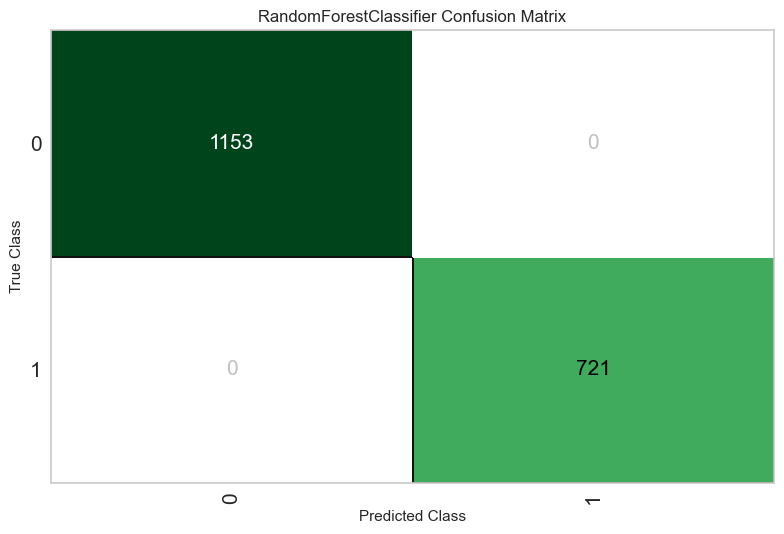

In [39]:
plot_model(rf, plot='confusion_matrix')

Of the 721 sellers who did not actually resell, the model correctly identified 585 (81%). If the model had operated in March/2018 (oot basis), the commission loss would have fallen from 721 * R\$ 110 = **R\$ 79,310.00** to 136 * R\$ 110 = **R \$ 14,960.00**, generating `gross savings` of **R\$ 64,350.00**, which represents 81% of loss of commission.

We can also include the cost of offering the discount coupon to **True Positives** and **False Positives**, respectively, **585** and **116** sellers. This term represents the `cost of operating the model`, which is (585 + 116) \* R\$ 20 = **R\$ 14,020.00**.

With the `gross savings` in hand and the `cost of operating the model`, we can calculate the `net or effective savings`:

`net savings` = `gross savings` - `cost of operating the model`

`net savings` = R\$ 65,350.00 - R\$ 14,020.00 = **R\$ 50,330.00**, which represents 63% of the commission loss.

In other words, if the model had been in production and operated in the March/2018 harvest, of the total lost commission of **R\$ 79,310.00**, we would save **R\$ 50,330.00** in just a month, which extrapolating to the year gives the value of 12 * **R\$ 50,330.00** = **R\$ 603,960.00** which does not would go down the drain simply due to the model's performance.

Observation:
*This cost was calculated assuming that the model will be used for automatic decision making, with a cutoff point of 0.5. By changing this cutoff point, the confusion matrix together with the metrics will change, resulting in worse or better values of effective savings*.

If the model is used to order the salespeople in our base according to the highest probability of churning, thus allowing preventive action based on a percentage of the base, we can use the cumulative gains curve:

### Estimate of Financial Gain for Ordering Model

Ordination models do not use a cutoff point on probability. When the model is used in an orderly manner it does not make the final decision and instead only provides the score/probability of a given seller not reselling. Generally an analyst or other system makes the decision **if** and **how** to act on the example. In this case we use the cumulative earnings curve.

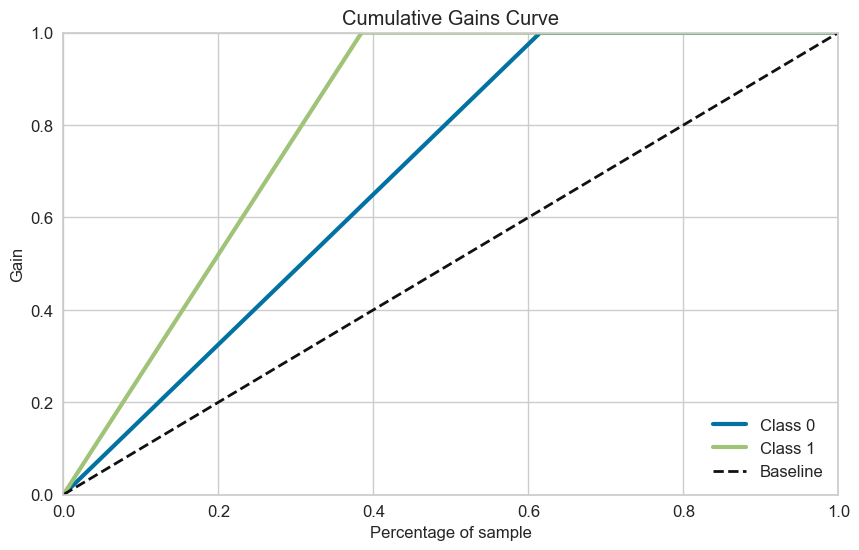

In [40]:
plot_model(rf, plot='gain')

Acting on around 39% of the base ordered in descending order by the probability of non-resale, we would be able to identify 100% of sellers who did not resell in the month of March/2018.

In [41]:
# how many sellers actually did not resell: 721
df_oot['nao_revendeu_next_6m'].value_counts()

nao_revendeu_next_6m
0    1153
1     721
Name: count, dtype: int64

In [42]:
# passing the 39% cut on the sorted basis, will we really be able to identify all 721 sellers 
# that they did not resell, as shown in the figure?
(
    predict_model(rf, data=df_oot)
    .assign(score_label1 = lambda df: np.where(df['nao_revendeu_next_6m'] == 1, df['prediction_score'], 1-df['prediction_score']))
    # sorting the base
    .sort_values(by='score_label1', ascending=False)
    # passing the cutoff at 39% of the ordered base
    .head(int(len(df_oot) * 0.39))
    # calculating frequency
    .filter(['nao_revendeu_next_6m'])
    .value_counts()
)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


nao_revendeu_next_6m
1                       721
0                         9
Name: count, dtype: int64

We actually did it! Selecting 39% of the sorted base, we were able to detect all 721 sellers who did not resell, with a residual of 9 false positives.

We will send the commission discount coupon to 730 sellers (representing 39% of the ordered base). This gives us a `model performance cost` of 730 * R\$ 20 = **R\$ 14,600.00**. With this cost, we managed to prevent all sellers from not reselling, that is, we eliminated the commission loss of **R\$ 79,310.00**, generating savings of R\$ 79,310.00 - R\$ 14,600.00 = **R\$ 64,710.00** in the month, which extrapolated to the year gives 12 * R\$ 64,710.00 = **R\$ 776,520.00** savings.

## Finalizing the Model

The `finalize_model` function will train the model on our entire database. In other words, we will combine the training and testing data to finish training the model.

In [43]:
final_model = finalize_model(rf)

Now we can save this model to be used in production:

In [46]:
save_model(final_model, '/Users/dellacorte/py-projects/data-science/automated-machine-learning-reference/models/olist_pycaret_final_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['tot_orders_12m', 'tot_items_12m',
                                              'tot_items_dist_12m',
                                              'receita_12m', 'recencia'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy='mean'))),
                 ('categorical_imputer',
                  Tran...
                  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
              

In [ ]:
#